In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import sqlite3
import glob
import os
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,9)

In [2]:
raw_datafiles = glob.glob('../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/**_V2.sqlite')
raw_datafiles.sort()
raw_datafiles.append('../simulations/illinois/expensive_nuclear/IL_XN_CC30_52.sqlite')
raw_datafiles

['../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2010_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2011_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2012_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2013_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2014_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2015_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2016_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2017_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2018_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_

In [3]:
def get_scenario_id(filepath):
    filename = filepath.split('/')[-1].strip('.sqlite')
    identifiers = filename.split('_')
    windyr = identifiers[-3]  
    solaryr = identifiers[-4]
    strID = windyr+'_'+solaryr 
    return(strID)

In [4]:
def get_average_capacity_factors(filepath):
    connector = sqlite3.connect(filepath)
    cursor=connector.cursor()
    command = """SELECT tech, AVG(cf_tech) FROM CapacityFactorTech 
                 WHERE tech IS 'WIND_FARM' OR tech IS 'SOLAR_FARM'
                 GROUP BY tech"""
    metadata = cursor.execute(command)
    data = cursor.fetchall()
    return data

In [5]:
all_data={}
all_data['WIND_FARM'] = []
all_data['SOLAR_FARM'] = []
for i,f in enumerate(raw_datafiles):
    scenario_data = get_average_capacity_factors(f)

    for d in scenario_data:
        all_data[d[0]].append(d[1])
        
cf_df = pd.DataFrame(all_data)

In [6]:
cf_df

,WIND_FARM,SOLAR_FARM
0,0.318535,0.177517
1,0.358176,0.177517
2,0.350307,0.177517
3,0.354733,0.177517
4,0.357163,0.177517
...,...,...
117,0.367531,0.164922
118,0.339977,0.164922
119,0.346948,0.164922
120,0.330718,0.164922


In [9]:
obj_df = pd.read_csv('../data/results/objective_value_XN_V2.csv', usecols=['Objective_Value'])
obj_df

,Objective_Value
0,156221.644879
1,152978.632488
2,157709.649171
3,154773.396960
4,159020.901028
...,...
117,161912.096378
118,161385.122481
119,156198.017837
120,160746.359625


In [10]:
new_df = pd.concat([cf_df, obj_df], axis=1)
new_df

,WIND_FARM,SOLAR_FARM,Objective_Value
0,0.318535,0.177517,156221.644879
1,0.358176,0.177517,152978.632488
2,0.350307,0.177517,157709.649171
3,0.354733,0.177517,154773.396960
4,0.357163,0.177517,159020.901028
...,...,...,...
117,0.367531,0.164922,161912.096378
118,0.339977,0.164922,161385.122481
119,0.346948,0.164922,156198.017837
120,0.330718,0.164922,160746.359625


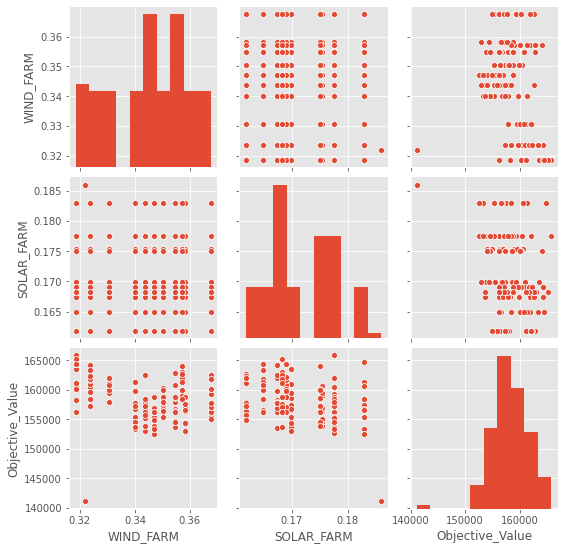

In [11]:
sb.pairplot(new_df)

<AxesSubplot:xlabel='SOLAR_FARM', ylabel='Objective_Value'>

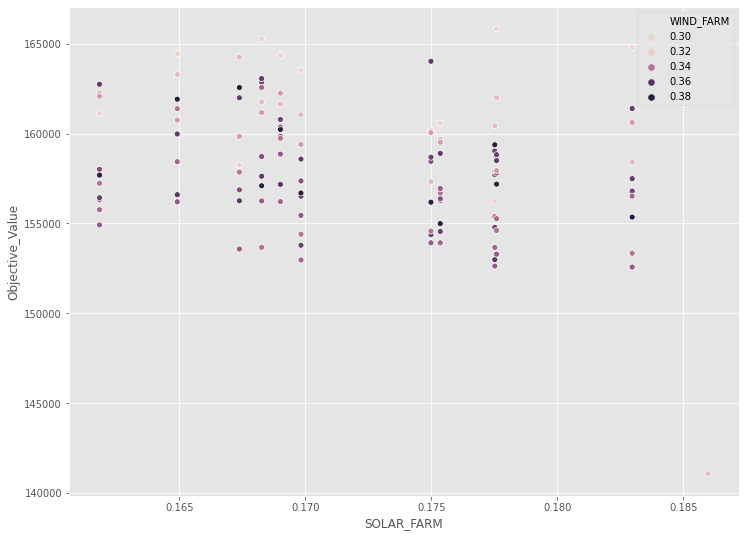

In [12]:
sb.scatterplot(data=new_df, x='SOLAR_FARM', y='Objective_Value', hue='WIND_FARM')

In [13]:
new_df['AVG_RE_CF'] = (new_df['SOLAR_FARM'] + new_df['WIND_FARM'])/2

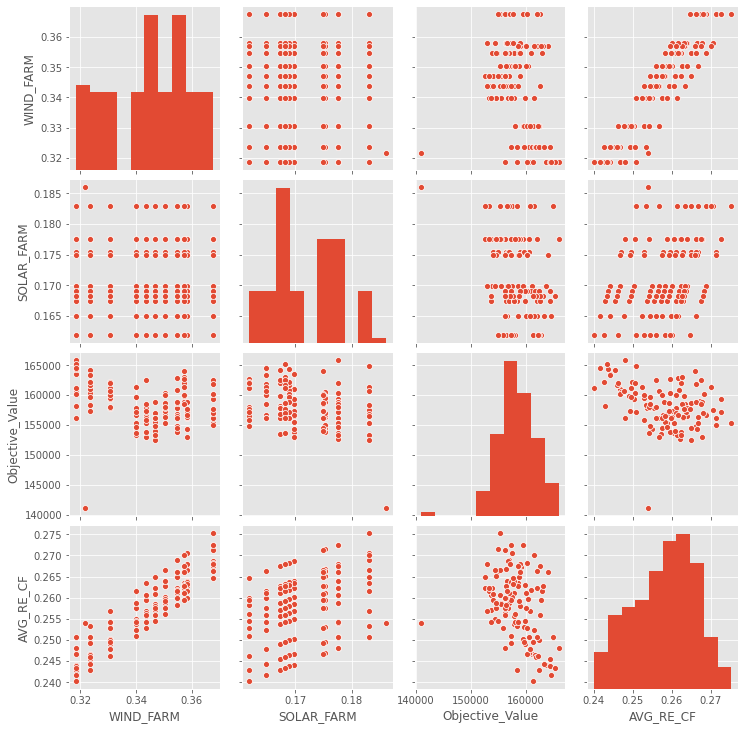

In [14]:
sb.pairplot(new_df)

In [15]:
corrs = new_df.corr()
corrs

,WIND_FARM,SOLAR_FARM,Objective_Value,AVG_RE_CF
WIND_FARM,1.000000,-0.029197,-0.279619,0.920186
SOLAR_FARM,-0.029197,1.000000,-0.310756,0.364447
Objective_Value,-0.279619,-0.310756,1.000000,-0.382205
AVG_RE_CF,0.920186,0.364447,-0.382205,1.000000


In [18]:
min_obj = min(new_df['Objective_Value'])

In [20]:
outlier_free = new_df[new_df['Objective_Value']>min_obj]
outlier_free

,WIND_FARM,SOLAR_FARM,Objective_Value,AVG_RE_CF
0,0.318535,0.177517,156221.644879,0.248026
1,0.358176,0.177517,152978.632488,0.267847
2,0.350307,0.177517,157709.649171,0.263912
3,0.354733,0.177517,154773.396960,0.266125
4,0.357163,0.177517,159020.901028,0.267340
...,...,...,...,...
116,0.323693,0.164922,163279.185236,0.244308
117,0.367531,0.164922,161912.096378,0.266227
118,0.339977,0.164922,161385.122481,0.252449
119,0.346948,0.164922,156198.017837,0.255935


In [22]:
corrs2 = outlier_free.corr()
corrs2

,WIND_FARM,SOLAR_FARM,Objective_Value,AVG_RE_CF
WIND_FARM,1.000000e+00,-1.280254e-15,-0.386611,0.923500
SOLAR_FARM,-1.280254e-15,1.000000e+00,-0.249157,0.383599
Objective_Value,-3.866108e-01,-2.491567e-01,1.000000,-0.452611
AVG_RE_CF,9.234999e-01,3.835988e-01,-0.452611,1.000000


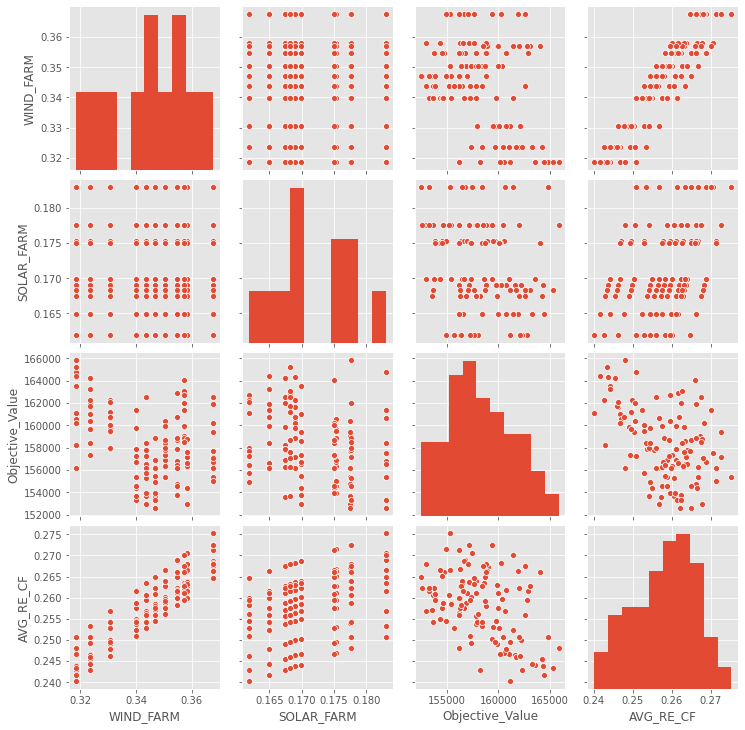

In [23]:
sb.pairplot(outlier_free)